In [1]:
import cv2
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (13, 8)

In [2]:
img_rgb = cv2.imread('bc.tif')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

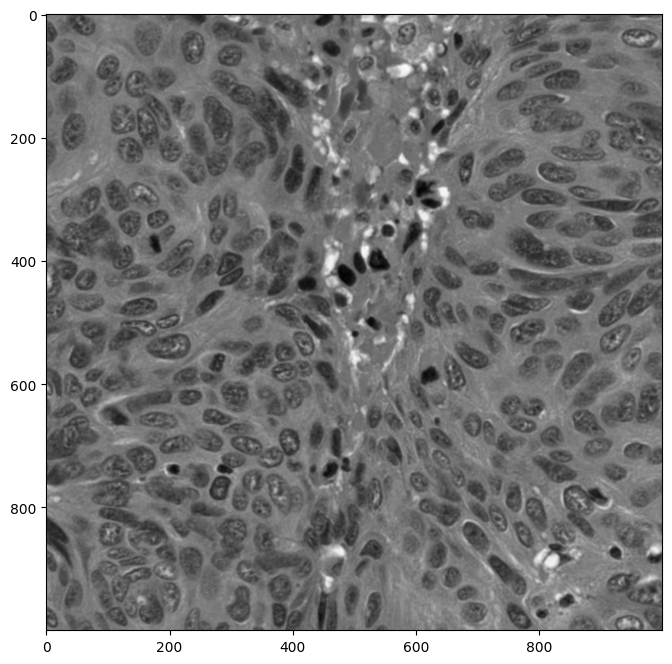

In [3]:
img = cv2.imread('bc.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray', interpolation='bicubic')

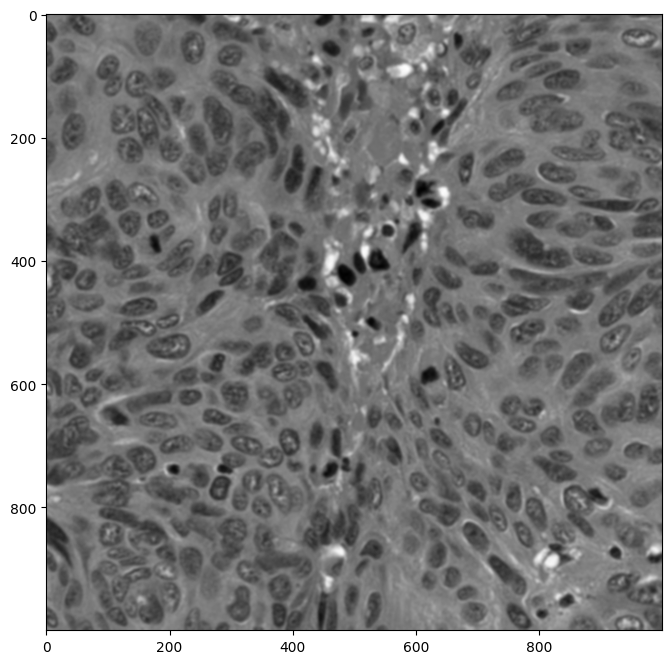

In [4]:
img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

plt.imshow(img,cmap='gray', interpolation = 'bicubic')

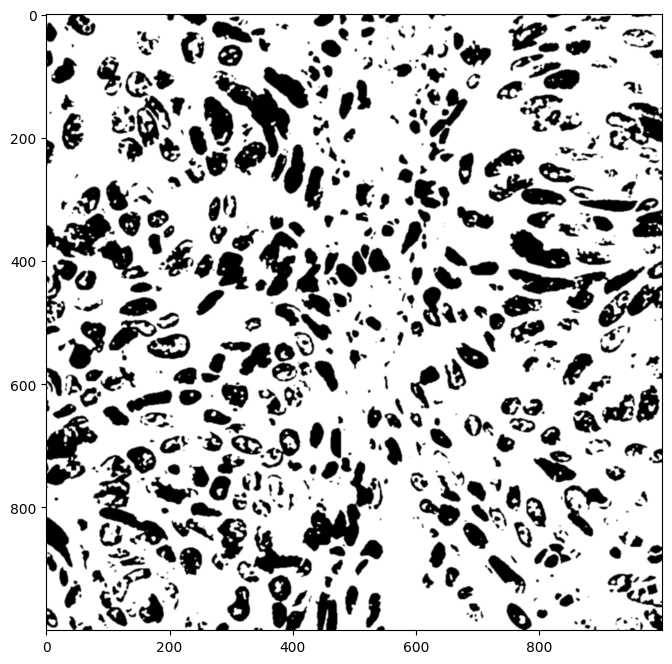

In [5]:
filtered = cv2.inRange(img, (100), (175))

#HSV 179, 255, 164
plt.imshow(filtered,cmap='gray', interpolation = 'bicubic')

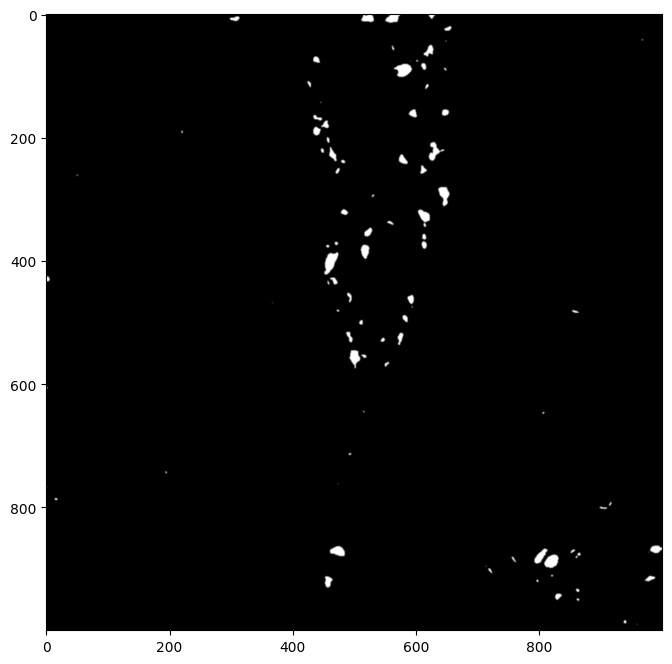

In [6]:
white_mask = cv2.inRange(img, (180), (255))
plt.imshow(white_mask,cmap='gray', interpolation = 'bicubic')

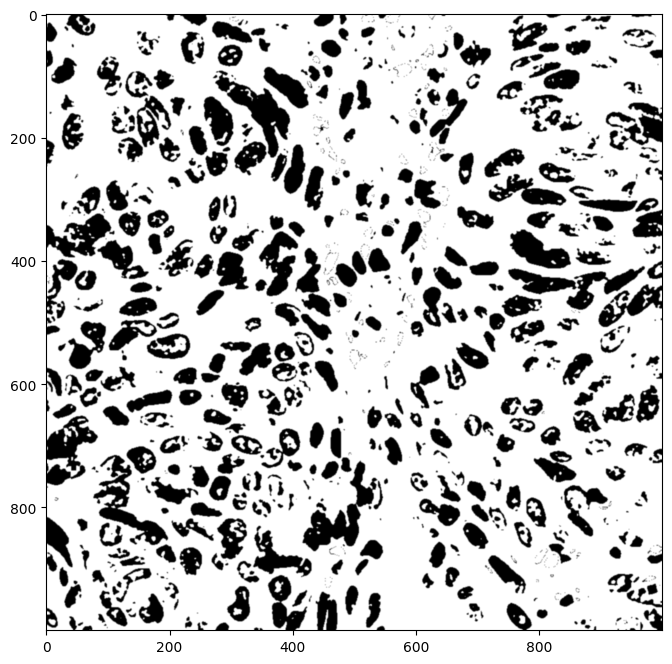

In [7]:
mask_diff = filtered + white_mask
plt.imshow(mask_diff,cmap='gray', interpolation = 'bicubic')

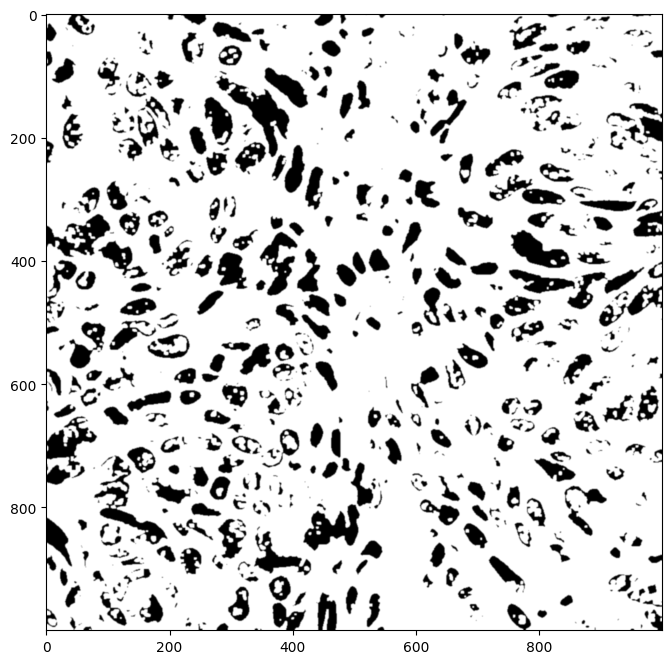

In [21]:
kernel = np.ones((3, 3), np.uint8)
img_dilatated = cv2.dilate(mask_diff, kernel, iterations=1)
plt.imshow(img_dilatated,cmap='gray', interpolation = 'bicubic')

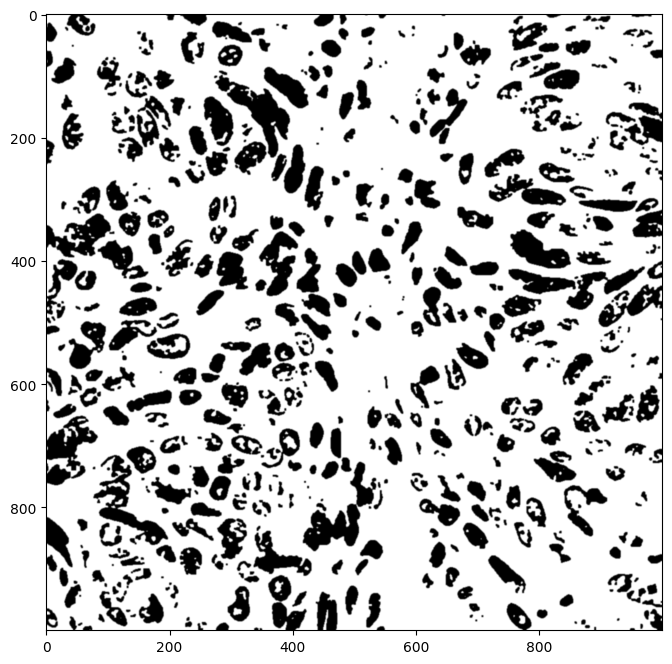

In [22]:
img_erosion = cv2.erode(img_dilatated, kernel, iterations=1)
plt.imshow(img_erosion,cmap='gray', interpolation = 'bicubic')

In [31]:
def find_countours(img, min_area=100):
    cnts,_ = cv2.findContours(img.copy(), cv2.RETR_LIST,
            cv2.CHAIN_APPROX_SIMPLE)

    contours_count = 0
    final_countours = []
    for c in cnts:
        if cv2.contourArea(c) > min_area:
            final_countours.append(c)
            contours_count += 1
    return contours_count, final_countours

count, contours = find_countours(img_erosion.copy(), 100)

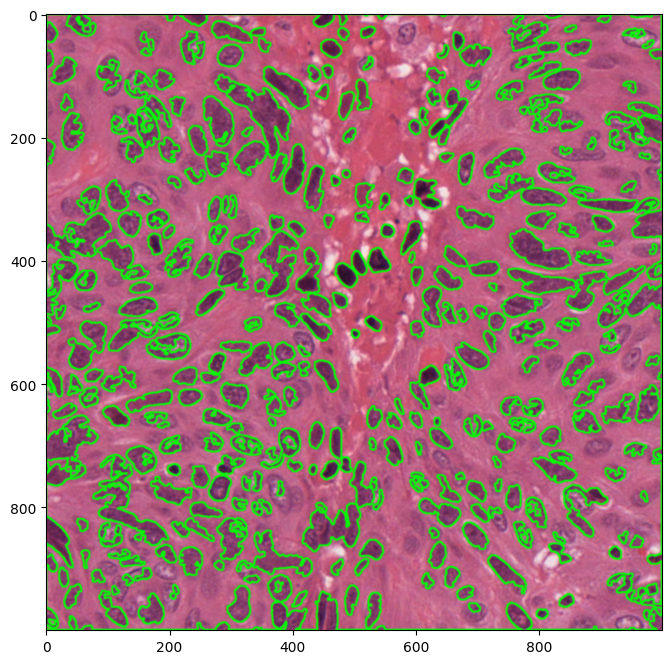

In [32]:
out = img_rgb.copy()
cv2.drawContours(out, contours, -1, (0, 255, 0), 2)
plt.imshow(out, cmap='gray', interpolation='bicubic')

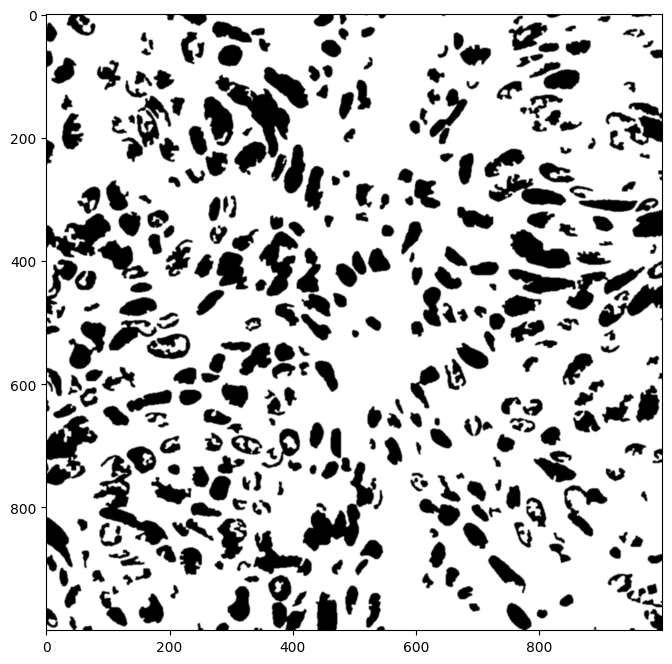

In [33]:
img_test = img.copy()*0
contours_only = cv2.fillPoly(img_test, contours, 255)
plt.imshow(contours_only, cmap='gray', interpolation='bicubic')

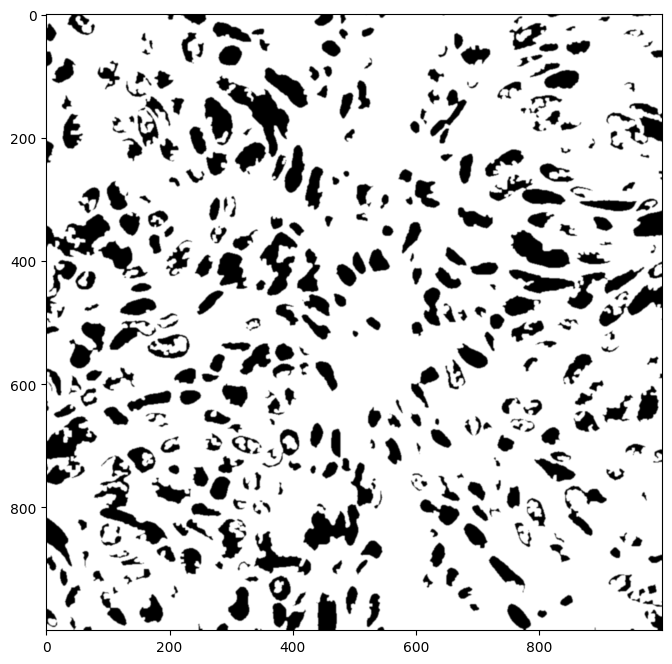

In [30]:
img_dilatated = cv2.dilate(contours_only, kernel, iterations=1)
plt.imshow(img_dilatated, cmap='gray', interpolation='bicubic')

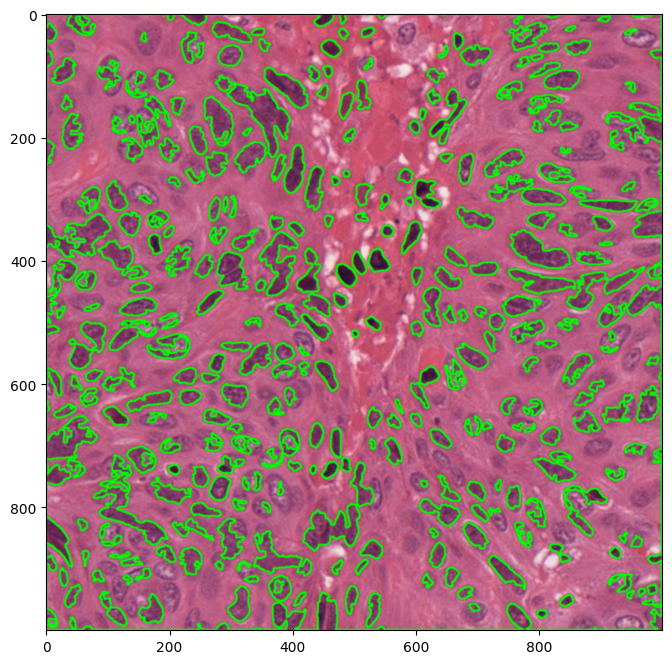

In [35]:
final_count, final_contours = find_countours(img_dilatated, 70)
plt.imshow(img_dilatated, cmap='gray', interpolation='bicubic')
out = img_rgb.copy()
cv2.drawContours(out, final_contours, -1, (0, 255, 0), 2)
plt.imshow(out, cmap='gray', interpolation='bicubic')